# DW_pandas_Test1

## 20201230

DataWhale_pandas组队学习测试一，试试。

In [1]:
import pandas as pd
import numpy as np

## 【任务一】
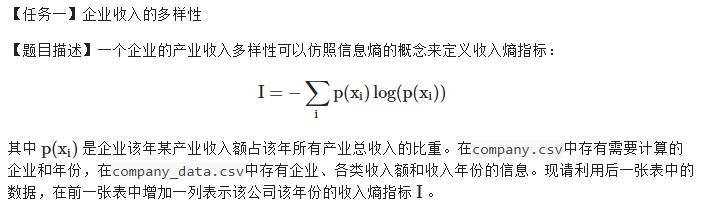

In [2]:
df1 = pd.read_csv('data/company.csv')
df2 = pd.read_csv('data/company_data.csv')

In [3]:
df1.head()

,证券代码,日期
0,#000007,2014
1,#000403,2015
2,#000408,2016
3,#000408,2017
4,#000426,2015


In [4]:
df1.证券代码.unique()

array(['#000007', '#000403', '#000408', '#000426', '#000511', '#000571',
       '#000584', '#000587', '#000603', '#000639', '#000667', '#000672',
       '#000693', '#000700', '#000718', '#000821', '#000836', '#000887',
       '#000910', '#000929', '#000982', '#001696', '#002009', '#002023',
       '#002026', '#002034', '#002041', '#002049', '#002050', '#002064',
       '#002070', '#002076', '#002078', '#002082', '#002085', '#002097',
       '#002099', '#002102', '#002104', '#002105', '#002111', '#002132',
       '#002133', '#002156', '#002165', '#002166', '#002174', '#002175',
       '#002194', '#002201', '#002206', '#002210', '#002211', '#002212',
       '#002216', '#002218', '#002221', '#002224', '#002225', '#002229',
       '#002231', '#002234', '#002239', '#002247', '#002250', '#002255',
       '#002259', '#002269', '#002275', '#002276', '#002284', '#002293',
       '#002294', '#002299', '#002300', '#002309', '#002316', '#002317',
       '#002323', '#002325', '#002328', '#002330', 

#### 思路：
df1，改证券代码，去掉#号健，df2，补足证券代码6位，归并日期为年份，而后再并表进行计算。

In [5]:
df1.证券代码 = df1.证券代码.str[1:]   # 去除证券代码#号
df1.head()

,证券代码,日期
0,000007,2014
1,000403,2015
2,000408,2016
3,000408,2017
4,000426,2015


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   证券代码    1048 non-null   object
 1   日期      1048 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.5+ KB


In [7]:
df2.tail()

,证券代码,日期,收入类型,收入额
964017,900957,2016/12/31,12,0.00
964018,900957,2016/12/31,13,0.00
964019,900957,2016/12/31,14,52072238.97
964020,900957,2016/12/31,15,0.00
964021,900957,2016/12/31,16,52072238.97


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964022 entries, 0 to 964021
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   证券代码    964022 non-null  int64  
 1   日期      964022 non-null  object 
 2   收入类型    964022 non-null  int64  
 3   收入额     940887 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 29.4+ MB


In [9]:
df2.证券代码.unique()

array([     1,      2,      4, ..., 900953, 900956, 900957], dtype=int64)

In [10]:
df2.证券代码.value_counts()

2024      989
600117    924
2109      909
600351    892
43        883
         ... 
603323     10
600919     10
2807       10
600001     10
200041      6
Name: 证券代码, Length: 3172, dtype: int64

In [11]:
df2.证券代码 = df2.证券代码.astype('str')    # 改df2证券代码类型为字符串
df2.证券代码  = df2.证券代码.str.zfill(6)    # 对证券代码6位补0
df2.head()

,证券代码,日期,收入类型,收入额
0,000001,2008/12/31,1,1.084218e+10
1,000001,2008/12/31,2,1.259789e+10
2,000001,2008/12/31,3,1.451312e+10
3,000001,2008/12/31,4,1.063843e+09
4,000001,2008/12/31,5,8.513880e+08


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964022 entries, 0 to 964021
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   证券代码    964022 non-null  object 
 1   日期      964022 non-null  object 
 2   收入类型    964022 non-null  int64  
 3   收入额     940887 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 29.4+ MB


In [13]:
df2.日期.value_counts()

2013/12/31    155994
2012/12/31    149876
2016/12/31    122270
2011/12/31    117346
2015/12/31    109262
2014/12/31     92848
2010/12/31     90877
2009/12/31     73401
2008/12/31     52148
Name: 日期, dtype: int64

In [14]:
df2.日期 = pd.to_datetime(df2.日期)   # 将日期转换为datatime类型
df2.日期 = df2.日期.dt.year   # 提取为年份数据
df2.head()

,证券代码,日期,收入类型,收入额
0,000001,2008,1,1.084218e+10
1,000001,2008,2,1.259789e+10
2,000001,2008,3,1.451312e+10
3,000001,2008,4,1.063843e+09
4,000001,2008,5,8.513880e+08


In [15]:
df3 = df1.merge(df2, on=['证券代码', '日期'], how='left')   # 将数据并入df1
df3

,证券代码,日期,收入类型,收入额
0,000007,2014,1.0,6.146172e+07
1,000007,2014,2.0,0.000000e+00
2,000007,2014,3.0,6.146172e+07
3,000007,2014,4.0,9.863111e+07
4,000007,2014,5.0,8.000000e+07
...,...,...,...,...
51541,600978,2016,33.0,4.591668e+09
51542,600978,2016,34.0,3.554853e+09
51543,600978,2016,35.0,1.728503e+08
51544,600978,2016,36.0,3.727704e+09


In [16]:
df3.isnull().sum()   # 查看数据是否有缺失值

证券代码      0
日期        0
收入类型     93
收入额     972
dtype: int64

In [17]:
df3 = df3.dropna(axis=0, subset = ["收入额"])    # 删除收入额为空值的行
df3

,证券代码,日期,收入类型,收入额
0,000007,2014,1.0,6.146172e+07
1,000007,2014,2.0,0.000000e+00
2,000007,2014,3.0,6.146172e+07
3,000007,2014,4.0,9.863111e+07
4,000007,2014,5.0,8.000000e+07
...,...,...,...,...
51540,600978,2016,32.0,7.121322e+06
51541,600978,2016,33.0,4.591668e+09
51542,600978,2016,34.0,3.554853e+09
51543,600978,2016,35.0,1.728503e+08


In [18]:
df3.isnull().sum()   #再次查看缺失值情况

证券代码    0
日期      0
收入类型    0
收入额     0
dtype: int64

In [19]:
df3.收入类型.unique()  #查看收入类型元素

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128.])

In [20]:
df4 = pd.DataFrame(df3.groupby(['证券代码', '日期', '收入类型'])['收入额'].sum())   # 按证券代码、年份和收入类型统计收入额
df4 = df4.reset_index()
df4

,证券代码,日期,收入类型,收入额
0,000007,2014,1.0,6.146172e+07
1,000007,2014,2.0,0.000000e+00
2,000007,2014,3.0,6.146172e+07
3,000007,2014,4.0,9.863111e+07
4,000007,2014,5.0,8.000000e+07
...,...,...,...,...
50569,600978,2016,32.0,7.121322e+06
50570,600978,2016,33.0,4.591668e+09
50571,600978,2016,34.0,3.554853e+09
50572,600978,2016,35.0,1.728503e+08


In [21]:
df3 = df3.reset_index(drop=True)
df3.equals(df4)    # 看上去df3和df4是相同的，

True

In [22]:
df4.set_index(['证券代码', '日期', '收入类型'],inplace=True)
df4

收入额
证券代码   日期   收入类型              
000007 2014 1.0   6.146172e+07
            2.0   0.000000e+00
            3.0   6.146172e+07
            4.0   9.863111e+07
            5.0   8.000000e+07
...                        ...
600978 2016 32.0  7.121322e+06
            33.0  4.591668e+09
            34.0  3.554853e+09
            35.0  1.728503e+08
            36.0  3.727704e+09

[50574 rows x 1 columns]

In [23]:
df4['比重'] = (100*df4['收入额']/df4['收入额'].sum(level = ['证券代码', '日期'])).round(2).map('{}%'.format)
df4

收入额     比重
证券代码   日期   收入类型                     
000007 2014 1.0   6.146172e+07  2.06%
            2.0   0.000000e+00   0.0%
            3.0   6.146172e+07  2.06%
            4.0   9.863111e+07  3.31%
            5.0   8.000000e+07  2.68%
...                        ...    ...
600978 2016 32.0  7.121322e+06  0.01%
            33.0  4.591668e+09   4.9%
            34.0  3.554853e+09   3.8%
            35.0  1.728503e+08  0.18%
            36.0  3.727704e+09  3.98%

[50574 rows x 2 columns]

In [24]:
def entropy(data):
    '''
    data: 数据集
    att_name: 属性名
    '''
    # 信息熵
    entlist = []
    pi = pd.value_counts(data) / len(data)
    ent = pi*np.log(pi)
    entlist.append(-ent)
    return entlist
print('收入熵指标:')
entropy(df4['比重'])

收入熵指标:


[0.0%      0.197573
 0.01%     0.128537
 0.02%     0.095209
 0.03%     0.079932
 0.04%     0.073067
             ...   
 7.67%     0.000214
 12.74%    0.000214
 17.89%    0.000214
 17.16%    0.000214
 9.57%     0.000214
 Name: 比重, Length: 1017, dtype: float64]

In [25]:
def entropy(data, att_name):
    '''
    data: 数据集
    att_name: 属性名
    '''
    levels = data[att_name].unique()
    # 信息熵
    ent = 0
    for lv in levels:
        pi = sum(data[att_name]==lv) / data.shape[0]
        ent += pi*np.log(pi)
    return -ent
print('收入熵指标:')
entropy(df4, '比重')

收入熵指标:


5.8306720039525635

做不下去了，解题应该是企业的每年各项收入除以每年总收入，而后计算出信息熵，目前卡壳在取值和计算过程，没找到类似的题目，晕了。

## 【任务二】
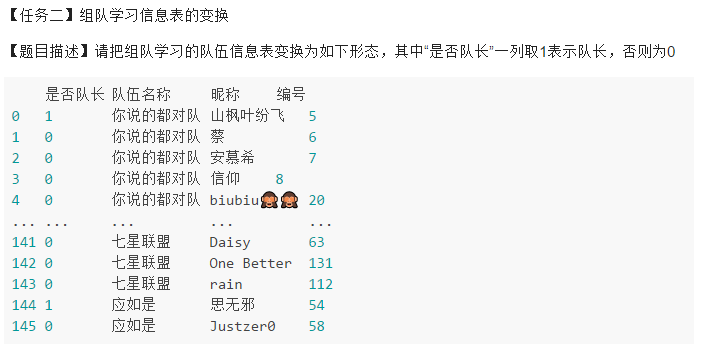

In [26]:
zd = pd.read_excel('data/组队信息汇总表.xlsx')
zd.head()

,所在群,队伍名称,队长编号,队长_群昵称,队员1 编号,队员_群昵称,队员2 编号,队员_群昵称.1,队员3 编号,队员_群昵称.2,...,队员6 编号,队员_群昵称.5,队员7 编号,队员_群昵称.6,队员8 编号,队员_群昵称.7,队员9 编号,队员_群昵称.8,队员10编号,队员_群昵称.9
0,Pandas数据分析,你说的都对队,5,山枫叶纷飞,6,蔡,7.0,安慕希,8.0,信仰,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Pandas数据分析,熊猫人,175,鱼呲呲,44,Heaven,37.0,吕青,50.0,余柳成荫,...,25.0,Never say never,55.0,K,120.0,Y.,28.0,X.Y.Q,151.0,swrong
2,Pandas数据分析,中国移不动,107,Y's,124,🥕,75.0,Vito,146.0,张小五,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pandas数据分析,panda,11,太下真君,35,柚子,108.0,My,42.0,星星点灯,...,157.0,Zys,158.0,不器,102.0,嘉平佑染,NaN,NaN,NaN,NaN
4,Pandas数据分析,一路向北,13,黄元帅,15,化,16.0,未期,18.0,太陽光下,...,23.0,🚀,169.0,听风,189.0,Cappuccino,NaN,NaN,NaN,NaN


In [27]:
zd = zd.reset_index()    # 保留索引，用来匹配队伍序号
zd.head()

,index,所在群,队伍名称,队长编号,队长_群昵称,队员1 编号,队员_群昵称,队员2 编号,队员_群昵称.1,队员3 编号,...,队员6 编号,队员_群昵称.5,队员7 编号,队员_群昵称.6,队员8 编号,队员_群昵称.7,队员9 编号,队员_群昵称.8,队员10编号,队员_群昵称.9
0,0,Pandas数据分析,你说的都对队,5,山枫叶纷飞,6,蔡,7.0,安慕希,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Pandas数据分析,熊猫人,175,鱼呲呲,44,Heaven,37.0,吕青,50.0,...,25.0,Never say never,55.0,K,120.0,Y.,28.0,X.Y.Q,151.0,swrong
2,2,Pandas数据分析,中国移不动,107,Y's,124,🥕,75.0,Vito,146.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Pandas数据分析,panda,11,太下真君,35,柚子,108.0,My,42.0,...,157.0,Zys,158.0,不器,102.0,嘉平佑染,NaN,NaN,NaN,NaN
4,4,Pandas数据分析,一路向北,13,黄元帅,15,化,16.0,未期,18.0,...,23.0,🚀,169.0,听风,189.0,Cappuccino,NaN,NaN,NaN,NaN


In [28]:
zd = zd.drop(columns='所在群')   # 删除列‘所在群’

In [29]:
zd = zd.rename(columns={'队长编号': '编号_队长', '队员1 编号': '编号_队员1',
                        '队员2 编号': '编号_队员2', '队员3 编号': '编号_队员3',
                        '队员4 编号': '编号_队员4', '队员5 编号': '编号_队员5',
                        '队员6 编号': '编号_队员6', '队员7 编号': '编号_队员7',
                        '队员8 编号': '编号_队员8', '队员9 编号': '编号_队员9',
                        '队员10编号': '编号_队员10', '队长_群昵称':'昵称_队长',
                        '队员_群昵称': '昵称_队员1', '队员_群昵称.1': '昵称_队员2',
                        '队员_群昵称.2': '昵称_队员3', '队员_群昵称.3': '昵称_队员4',
                        '队员_群昵称.4': '昵称_队员5', '队员_群昵称.5': '昵称_队员6',
                        '队员_群昵称.6': '昵称_队员7', '队员_群昵称.7': '昵称_队员8',
                        '队员_群昵称.8': '昵称_队员9', '队员_群昵称.9': '昵称_队员10'})    # 改变列名重新分类
zd.head()

,index,队伍名称,编号_队长,昵称_队长,编号_队员1,昵称_队员1,编号_队员2,昵称_队员2,编号_队员3,昵称_队员3,...,编号_队员6,昵称_队员6,编号_队员7,昵称_队员7,编号_队员8,昵称_队员8,编号_队员9,昵称_队员9,编号_队员10,昵称_队员10
0,0,你说的都对队,5,山枫叶纷飞,6,蔡,7.0,安慕希,8.0,信仰,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,熊猫人,175,鱼呲呲,44,Heaven,37.0,吕青,50.0,余柳成荫,...,25.0,Never say never,55.0,K,120.0,Y.,28.0,X.Y.Q,151.0,swrong
2,2,中国移不动,107,Y's,124,🥕,75.0,Vito,146.0,张小五,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,panda,11,太下真君,35,柚子,108.0,My,42.0,星星点灯,...,157.0,Zys,158.0,不器,102.0,嘉平佑染,NaN,NaN,NaN,NaN
4,4,一路向北,13,黄元帅,15,化,16.0,未期,18.0,太陽光下,...,23.0,🚀,169.0,听风,189.0,Cappuccino,NaN,NaN,NaN,NaN


In [30]:
zd_demo = pd.wide_to_long(zd,
                          stubnames=['昵称', '编号'],
                          i = ['index', '队伍名称'],
                          j='是否队长',
                          sep='_',
                          suffix='.+')         # 变形拆分数据
zd_demo

昵称    编号
index 队伍名称   是否队长                
0     你说的都对队 队长      山枫叶纷飞    5.0
             队员1         蔡    6.0
             队员2       安慕希    7.0
             队员3         信仰   8.0
             队员4   biubiu🙈🙈  20.0
...                     ...   ...
20    应如是    队员6        NaN   NaN
             队员7        NaN   NaN
             队员8        NaN   NaN
             队员9        NaN   NaN
             队员10       NaN   NaN

[231 rows x 2 columns]

In [31]:
zd_demo = zd_demo.reset_index()
zd_demo

,index,队伍名称,是否队长,昵称,编号
0,0,你说的都对队,队长,山枫叶纷飞,5.0
1,0,你说的都对队,队员1,蔡,6.0
2,0,你说的都对队,队员2,安慕希,7.0
3,0,你说的都对队,队员3,信仰,8.0
4,0,你说的都对队,队员4,biubiu🙈🙈,20.0
...,...,...,...,...,...
226,20,应如是,队员6,NaN,NaN
227,20,应如是,队员7,NaN,NaN
228,20,应如是,队员8,NaN,NaN
229,20,应如是,队员9,NaN,NaN


In [32]:
zd_demo['是否队长'] = zd_demo['是否队长'].replace(['队长', '队员1', '队员2', '队员3', '队员4', '队员5', '队员6', '队员7', '队员8', '队员9', '队员10'],
                             [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
# 替换队长队员标识
zd_demo.head()

,index,队伍名称,是否队长,昵称,编号
0,0,你说的都对队,1,山枫叶纷飞,5.0
1,0,你说的都对队,0,蔡,6.0
2,0,你说的都对队,0,安慕希,7.0
3,0,你说的都对队,0,信仰,8.0
4,0,你说的都对队,0,biubiu🙈🙈,20.0


In [33]:
zd_demo = zd_demo.dropna(axis=0, subset = ['昵称', '编号'])    #删除空值行
zd_demo

,index,队伍名称,是否队长,昵称,编号
0,0,你说的都对队,1,山枫叶纷飞,5.0
1,0,你说的都对队,0,蔡,6.0
2,0,你说的都对队,0,安慕希,7.0
3,0,你说的都对队,0,信仰,8.0
4,0,你说的都对队,0,biubiu🙈🙈,20.0
...,...,...,...,...,...
213,19,七星联盟,0,Daisy,63.0
214,19,七星联盟,0,One Better,131.0
215,19,七星联盟,0,rain,112.0
220,20,应如是,1,思无邪,54.0


In [34]:
zd_demo = zd_demo[['index', '是否队长', '队伍名称', '昵称', '编号']] 
zd_demo   # 对列重新排序

,index,是否队长,队伍名称,昵称,编号
0,0,1,你说的都对队,山枫叶纷飞,5.0
1,0,0,你说的都对队,蔡,6.0
2,0,0,你说的都对队,安慕希,7.0
3,0,0,你说的都对队,信仰,8.0
4,0,0,你说的都对队,biubiu🙈🙈,20.0
...,...,...,...,...,...
213,19,0,七星联盟,Daisy,63.0
214,19,0,七星联盟,One Better,131.0
215,19,0,七星联盟,rain,112.0
220,20,1,应如是,思无邪,54.0


In [35]:
zd_demo = zd_demo.astype({'编号':'int64'})
zd_demo   # 修改编号类型为整数型

,index,是否队长,队伍名称,昵称,编号
0,0,1,你说的都对队,山枫叶纷飞,5
1,0,0,你说的都对队,蔡,6
2,0,0,你说的都对队,安慕希,7
3,0,0,你说的都对队,信仰,8
4,0,0,你说的都对队,biubiu🙈🙈,20
...,...,...,...,...,...
213,19,0,七星联盟,Daisy,63
214,19,0,七星联盟,One Better,131
215,19,0,七星联盟,rain,112
220,20,1,应如是,思无邪,54


In [36]:
zd_demo = zd_demo.drop(columns='index')   # 删除列‘index’
zd_demo = zd_demo.reset_index(drop=True)  # 作最后的格式调整
zd_demo

,是否队长,队伍名称,昵称,编号
0,1,你说的都对队,山枫叶纷飞,5
1,0,你说的都对队,蔡,6
2,0,你说的都对队,安慕希,7
3,0,你说的都对队,信仰,8
4,0,你说的都对队,biubiu🙈🙈,20
...,...,...,...,...
141,0,七星联盟,Daisy,63
142,0,七星联盟,One Better,131
143,0,七星联盟,rain,112
144,1,应如是,思无邪,54


这道题一个坑在排序，刚开始做到最后，以为调整格式排序一下就可以了，发现怎么也排不了示例的样子，看了导入的文本是按照原始的输入顺序进行排序，并没有规律，于是将索引转换为列，以此来保证顺序保证原来的样子。还有觉的改变列名那一步做的太繁琐了，应该有更简便的方法，技巧和熟练程度不好都有关系，用的都是最笨的方法。

## 【任务三】
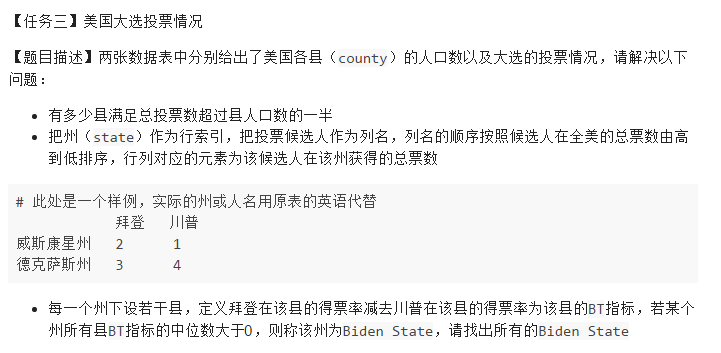

这几天年度工作很忙，心神不宁，无法集中精力，加上基础薄弱，脑子已经完全混乱，不够用了，只能解出一道半题，原谅我如此低质的作业吧。😢😢